# Worldwide Gross Models

## Import libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA

## Getting the data

In [2]:
df_movies = pd.read_csv('../data/processed/pixar_movies_complete.csv')
df_movies

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.00,191.80,170.20,52.98,47.02,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.40,162.80,200.60,44.80,55.20,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.00,245.90,239.20,50.70,49.32,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.80,255.90,272.90,48.39,51.61,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.60,339.70,555.90,37.93,62.07,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.40,261.40,370.00,41.40,58.60,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.00,244.10,217.90,52.84,47.16,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.70,206.40,417.30,33.09,66.91,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.30,223.80,297.50,42.93,57.07,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.30,293.00,438.30,40.07,59.93,175,5.0,2.0


## Droping columns

In [3]:
df_movies_numeric = df_movies.drop(['Domestic Gross', 'International Gross', 'Domestic %', 'International %', 'Oscars Nominated', 'Oscars Won', 'Movie'], axis=1)
df_movies_numeric

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Production Budget
0,1995,81,100,8.3,92,29.14,362.00,30
1,1998,96,92,7.2,77,33.26,363.40,45
2,1999,92,100,7.9,88,57.39,485.00,90
3,2001,90,96,8.1,78,62.58,528.80,115
4,2003,104,99,8.2,90,70.25,895.60,94
5,2004,115,97,8.0,90,70.47,631.40,92
6,2006,116,74,7.2,73,60.12,462.00,70
7,2007,111,96,8.0,96,47.00,623.70,150
8,2008,97,96,8.4,94,63.10,521.30,180
9,2009,96,98,8.3,88,68.11,731.30,175


## Standardizing Data

In [4]:
movies = df_movies_numeric.values

sc = StandardScaler()
movies_scaled = sc.fit_transform(movies)

df_movies_scaled = pd.DataFrame(movies_scaled, columns=df_movies_numeric.columns)
df_movies_scaled

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Production Budget
0,-2.110039,-2.397015,0.818367,1.096596,1.111414,-0.871969,-0.637778,-2.413481
1,-1.725499,-0.623133,0.235421,-0.598682,-0.148619,-0.771991,-0.633473,-2.125722
2,-1.597319,-1.096168,0.818367,0.480131,0.775405,-0.186441,-0.259590,-1.262447
3,-1.340959,-1.332686,0.526894,0.788364,-0.064617,-0.060498,-0.124918,-0.782850
4,-1.084600,0.322938,0.745499,0.942480,0.943409,0.125626,1.002881,-1.185712
5,-0.956420,1.623784,0.599762,0.634247,0.943409,0.130964,0.190546,-1.224080
6,-0.700060,1.742043,-1.076209,-0.598682,-0.484628,-0.120194,-0.330308,-1.646125
7,-0.571880,1.150749,0.526894,0.634247,1.447422,-0.438570,0.166871,-0.111414
8,-0.443700,-0.504874,0.526894,1.250712,1.279418,-0.047880,-0.147978,0.464103
9,-0.315520,-0.623133,0.672631,1.096596,0.775405,0.073695,0.497708,0.368183


In [5]:
sc_y = StandardScaler().fit(df_movies_numeric['Worldwide Gross'].values.reshape(-1,1))

## Model with Raw DataFrame

In [6]:
X = df_movies_scaled[['IMDB Score', 'Opening Weekend']].values
y = df_movies_scaled['Worldwide Gross'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [7]:
X_train

array([[ 0.17189883,  1.35496461],
       [-1.36926309, -0.27622701],
       [ 1.25071218, -0.0478796 ],
       [-0.59868213,  0.02977308],
       [ 0.48013121, -0.1864411 ],
       [-0.29044975,  0.42119113],
       [-0.29044975, -0.62978937],
       [-0.59868213, -0.77199084],
       [-0.90691452, -1.57909339],
       [ 0.94247979,  0.12562561],
       [ 1.09659598,  0.07369538],
       [ 1.25071218,  1.09774011],
       [-2.29396025, -0.35169571],
       [ 0.7883636 , -0.06049816],
       [ 0.63424741, -0.43856965],
       [ 0.01778264,  2.85414668],
       [ 0.63424741, -1.57909339],
       [ 0.63424741,  0.13096423],
       [-1.98572786,  1.06595104],
       [-0.29044975, -1.57909339]])

In [8]:
sk_model = LinearRegression(fit_intercept=False)
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred_sk)
r2 = r2_score(y_test, y_pred_sk)

print('r2: ', r2)
print('mse: ', mse)

r2:  0.8645450413935158
mse:  0.0925130753195842


In [10]:
from scipy import stats

params = np.append(sk_model.intercept_, sk_model.coef_)
predictions = sk_model.predict(X_train)

newX = np.append(np.ones((len(X_train), 1)), X_train, axis=1)
MSE = (sum((y_train - predictions) ** 2)) / (len(newX) - len(newX[0]))

var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params / sd_b

p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - 1))) for i in ts_b]

# Print the p-values for the coefficients
print(p_values)

[1.0, 0.0002550220158463734, 3.63197472097454e-10]


#### Cross Validation

In [11]:
cross_sk_model = LinearRegression()
cv_scores = cross_val_score(cross_sk_model, X, y, cv=3)
print(cv_scores)

[0.38790775 0.91722012 0.92074645]


## Model with some categorical features

### Adding the pandemic movie category

In [12]:
df_movies_scaled['Pandemic Movies'] = (df_movies['Worldwide Gross'] < 200).astype(int)
df_movies_scaled

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Production Budget,Pandemic Movies
0,-2.110039,-2.397015,0.818367,1.096596,1.111414,-0.871969,-0.637778,-2.413481,0
1,-1.725499,-0.623133,0.235421,-0.598682,-0.148619,-0.771991,-0.633473,-2.125722,0
2,-1.597319,-1.096168,0.818367,0.480131,0.775405,-0.186441,-0.259590,-1.262447,0
3,-1.340959,-1.332686,0.526894,0.788364,-0.064617,-0.060498,-0.124918,-0.782850,0
4,-1.084600,0.322938,0.745499,0.942480,0.943409,0.125626,1.002881,-1.185712,0
5,-0.956420,1.623784,0.599762,0.634247,0.943409,0.130964,0.190546,-1.224080,0
6,-0.700060,1.742043,-1.076209,-0.598682,-0.484628,-0.120194,-0.330308,-1.646125,0
7,-0.571880,1.150749,0.526894,0.634247,1.447422,-0.438570,0.166871,-0.111414,0
8,-0.443700,-0.504874,0.526894,1.250712,1.279418,-0.047880,-0.147978,0.464103,0
9,-0.315520,-0.623133,0.672631,1.096596,0.775405,0.073695,0.497708,0.368183,0


### Adding the Sequel Movie category

In [13]:
is_sequel = []
for movie in df_movies['Movie']:
  if any(c.isdigit() for c in movie) or 'Dory' in movie:
    is_sequel.append(1)
  else:
    is_sequel.append(0)

is_sequel

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]

In [14]:
df_movies_scaled['Sequel Movie'] = is_sequel
df_movies_scaled

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Production Budget,Pandemic Movies,Sequel Movie
0,-2.110039,-2.397015,0.818367,1.096596,1.111414,-0.871969,-0.637778,-2.413481,0,0
1,-1.725499,-0.623133,0.235421,-0.598682,-0.148619,-0.771991,-0.633473,-2.125722,0,0
2,-1.597319,-1.096168,0.818367,0.480131,0.775405,-0.186441,-0.259590,-1.262447,0,1
3,-1.340959,-1.332686,0.526894,0.788364,-0.064617,-0.060498,-0.124918,-0.782850,0,0
4,-1.084600,0.322938,0.745499,0.942480,0.943409,0.125626,1.002881,-1.185712,0,0
5,-0.956420,1.623784,0.599762,0.634247,0.943409,0.130964,0.190546,-1.224080,0,0
6,-0.700060,1.742043,-1.076209,-0.598682,-0.484628,-0.120194,-0.330308,-1.646125,0,0
7,-0.571880,1.150749,0.526894,0.634247,1.447422,-0.438570,0.166871,-0.111414,0,0
8,-0.443700,-0.504874,0.526894,1.250712,1.279418,-0.047880,-0.147978,0.464103,0,0
9,-0.315520,-0.623133,0.672631,1.096596,0.775405,0.073695,0.497708,0.368183,0,0


### Model

In [15]:
df_movies_scaled

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Production Budget,Pandemic Movies,Sequel Movie
0,-2.110039,-2.397015,0.818367,1.096596,1.111414,-0.871969,-0.637778,-2.413481,0,0
1,-1.725499,-0.623133,0.235421,-0.598682,-0.148619,-0.771991,-0.633473,-2.125722,0,0
2,-1.597319,-1.096168,0.818367,0.480131,0.775405,-0.186441,-0.259590,-1.262447,0,1
3,-1.340959,-1.332686,0.526894,0.788364,-0.064617,-0.060498,-0.124918,-0.782850,0,0
4,-1.084600,0.322938,0.745499,0.942480,0.943409,0.125626,1.002881,-1.185712,0,0
5,-0.956420,1.623784,0.599762,0.634247,0.943409,0.130964,0.190546,-1.224080,0,0
6,-0.700060,1.742043,-1.076209,-0.598682,-0.484628,-0.120194,-0.330308,-1.646125,0,0
7,-0.571880,1.150749,0.526894,0.634247,1.447422,-0.438570,0.166871,-0.111414,0,0
8,-0.443700,-0.504874,0.526894,1.250712,1.279418,-0.047880,-0.147978,0.464103,0,0
9,-0.315520,-0.623133,0.672631,1.096596,0.775405,0.073695,0.497708,0.368183,0,0


In [16]:
X = df_movies_scaled.drop(['Worldwide Gross', 'Pandemic Movies'], axis=1).values
y = df_movies_scaled['Worldwide Gross'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [17]:
cat_model = LinearRegression()
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print('r2: ', r2)
print('mse: ', mse)

r2:  0.7472601471816833
mse:  0.28706776843162946


#### Cross Validation

In [19]:
cross_cat_model = LinearRegression()
cv_scores = cross_val_score(cross_cat_model, X, y, cv=3)
print(cv_scores)

[-1.38646807  0.59243638  0.7861241 ]


## Applying PCA

In [138]:
df_movies_pca = df_movies_scaled.drop('Worldwide Gross', axis=1)
df_movies_pca

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Production Budget,Pandemic Movies,Sequel Movie
0,-2.110039,-2.397015,0.818367,1.096596,1.111414,-0.871969,-2.413481,0,0
1,-1.725499,-0.623133,0.235421,-0.598682,-0.148619,-0.771991,-2.125722,0,0
2,-1.597319,-1.096168,0.818367,0.480131,0.775405,-0.186441,-1.262447,0,1
3,-1.340959,-1.332686,0.526894,0.788364,-0.064617,-0.060498,-0.782850,0,0
4,-1.084600,0.322938,0.745499,0.942480,0.943409,0.125626,-1.185712,0,0
5,-0.956420,1.623784,0.599762,0.634247,0.943409,0.130964,-1.224080,0,0
6,-0.700060,1.742043,-1.076209,-0.598682,-0.484628,-0.120194,-1.646125,0,0
7,-0.571880,1.150749,0.526894,0.634247,1.447422,-0.438570,-0.111414,0,0
8,-0.443700,-0.504874,0.526894,1.250712,1.279418,-0.047880,0.464103,0,0
9,-0.315520,-0.623133,0.672631,1.096596,0.775405,0.073695,0.368183,0,0


In [139]:
pca = PCA()
pca.fit_transform(df_movies_pca)
pca_movie_scaled = pca.transform(df_movies_pca)

In [140]:
var = pca.explained_variance_ratio_
var

array([0.45074418, 0.21175601, 0.16992099, 0.089749  , 0.03114844,
       0.02124516, 0.01374306, 0.00732185, 0.00437133])

[45.07 66.25 83.24 92.21 95.32 97.44 98.81 99.54 99.98]


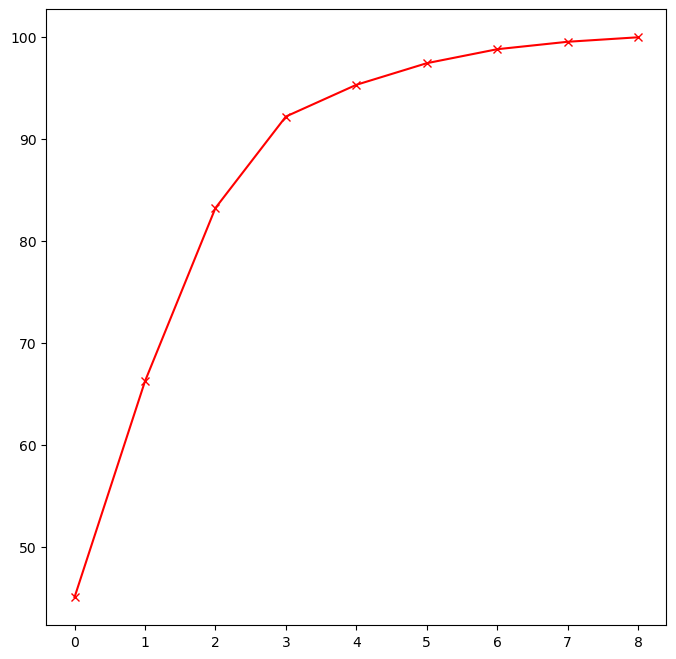

In [141]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(8,8))
plt.plot(cum_var, 'r-x');
print(cum_var)

In [142]:
pca_movie_scaled = pd.DataFrame(pca_movie_scaled)
pca_movie_scaled.drop([4,5,6,7,8], axis=1, inplace=True)

In [143]:
pca_movie_scaled

,0,1,2,3
0,-3.787734,-2.009773,0.492672,-1.077043
1,-1.424406,-2.150887,1.331763,-0.083793
2,-2.267045,-0.671570,0.687282,-0.831364
3,-1.725415,-0.814947,0.292310,-0.984565
4,-1.988645,0.183974,0.910726,0.527029
5,-1.414980,0.531297,1.453065,1.533982
6,0.549108,-0.888158,2.191706,1.427523
7,-1.252606,0.672412,0.341001,1.336188
8,-1.584700,0.731757,-0.535715,-0.185310
9,-1.343789,0.592420,-0.571062,-0.357404


## Model with Lasso

In [26]:
X = df_movies_scaled.drop('Worldwide Gross', axis=1)
y = df_movies_scaled['Worldwide Gross']

In [27]:
# param_grid = {
#   'alpha': np.arange(0.01, 1.01, 0.01)
# }
# lasso_model = Lasso()
# grid_lasso = GridSearchCV(lasso_model, param_grid)
# grid_lasso.fit(X, y)
# print(grid_lasso.best_params_)

In [28]:
lasso_model = Lasso(alpha=0.14)
lasso_model.fit(X, y)

y_pred_unscaled = sc_y.inverse_transform(lasso_model.predict(X).reshape(-1,1))
y_unscaled = df_movies_numeric['Worldwide Gross']

mae_lasso_unscaled = mean_absolute_error(y_unscaled, y_pred_unscaled)
mae_lasso_unscaled

97.2683222813533

## Model with ElasticNet

In [29]:
# param_grid = {
#   'alpha': np.arange(0.01, 1.01, 0.01),
#   'l1_ratio': np.arange(0.01, 1, 0.01)
# }
# elastic_model = ElasticNet()
# grid_elastic = GridSearchCV(elastic_model, param_grid, n_jobs=-1)
# grid_elastic.fit(X, y)
# print(grid_elastic.best_params_)

In [30]:
cv = LeaveOneOut()

elastic_model = ElasticNet(alpha=0.14, l1_ratio=0.99)

mae_scaled = -cross_val_score(elastic_model, X, y, scoring='neg_mean_absolute_error', cv=cv).mean()
mae_scaled

0.3486812052394608

In [31]:
elastic_model = ElasticNet(alpha=0.14, l1_ratio=0.99)
elastic_model.fit(X, y)

y_pred_unscaled = sc_y.inverse_transform(elastic_model.predict(X).reshape(-1,1))
y_unscaled = df_movies_numeric['Worldwide Gross']

mae_elastic_unscaled = mean_absolute_error(y_unscaled, y_pred_unscaled)
mae_elastic_unscaled

97.14873867047176

### PCA

In [32]:
X = pca_movie_scaled
y = df_movies_scaled['Worldwide Gross']

In [33]:
# elastic_pca_model = ElasticNet()
# grid_elastic_pca = GridSearchCV(elastic_pca_model, param_grid, n_jobs=-1)
# grid_elastic_pca.fit(X, y)
# print(grid_elastic_pca.best_params_)

In [34]:
elastic_pca_model = ElasticNet(alpha=0.01, l1_ratio=0.01)
elastic_pca_model.fit(X, y)

y_pred_unscaled = sc_y.inverse_transform(elastic_pca_model.predict(X).reshape(-1,1))
y_unscaled = df_movies_numeric['Worldwide Gross']

mae_elastic_pca_unscaled = mean_absolute_error(y_unscaled, y_pred_unscaled)
mae_elastic_pca_unscaled

79.40151525172288

## Ridge Model

In [35]:
X = pca_movie_scaled
y = df_movies_scaled['Worldwide Gross']

In [36]:
param_grid = {
  'alpha': np.arange(0.01, 1.01, 0.01),
  'fit_intercept': [True, False]
}
ridge_pca_model = Ridge()
grid_ridge_pca = GridSearchCV(ridge_pca_model, param_grid, n_jobs=-1)
grid_ridge_pca.fit(X, y)
print(grid_ridge_pca.best_params_)

{'alpha': 0.01, 'fit_intercept': False}


In [37]:
ridge_pca_model = Ridge(alpha=0.01, fit_intercept=False)
ridge_pca_model.fit(X, y)

y_pred_unscaled = sc_y.inverse_transform(ridge_pca_model.predict(X).reshape(-1,1))
y_unscaled = df_movies_numeric['Worldwide Gross']

mae_elastic_pca_unscaled = mean_absolute_error(y_unscaled, y_pred_unscaled)
mae_elastic_pca_unscaled

78.69176617480626

In [128]:
X = df_movies_scaled.drop('Worldwide Gross', axis=1)

param_grid = {
  'fit_intercept': [True, False]
}
linear_pca_model = LinearRegression()
grid_linear_pca = GridSearchCV(linear_pca_model, param_grid, n_jobs=-1)
grid_linear_pca.fit(X, y)
print(grid_linear_pca.best_params_)

{'fit_intercept': False}


In [137]:
linear_pca_model = LinearRegression(fit_intercept=False)
linear_pca_model.fit(X, y)

y_pred_unscaled = sc_y.inverse_transform(linear_pca_model.predict(X).reshape(-1,1))
y_unscaled = df_movies_numeric['Worldwide Gross']

mae_linear_pca_unscaled = mean_absolute_error(y_unscaled, y_pred_unscaled)
mae_linear_pca_unscaled

66.33084184196679

## RANSAC Model

In [135]:
X = df_movies_scaled.drop('Worldwide Gross', axis=1)

ransac_pca_model = RANSACRegressor(random_state=42)
ransac_pca_model.fit(X, y)

y_pred_unscaled = sc_y.inverse_transform(ransac_pca_model.predict(X).reshape(-1,1))
y_unscaled = df_movies_numeric['Worldwide Gross']

mae_linear_pca_unscaled = mean_absolute_error(y_unscaled, y_pred_unscaled)
mae_linear_pca_unscaled

57.806887311029655